#### <span style="font-family:'NEW TIME ROMAN';"> Web scrapping with python</br>- Project-Guided **FIRST PART** </br></sapn>

## <span style="font-family:'Times New Roman';">1- Collecting Data from web
</span>

In [44]:
# Use this key to First install the library in python
# !pip install xxx selenium 

<span style="font-family:'Times New Roman';"> 
Before starting here's importants things to verify: make sure that the edge driver we are using are compatible with the broswer.  For that we need to : 

 - [Microsoft Edge WebDriver.]('https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/?form=MA13LH#downloads')

 - We can also verify the compability [About]("edge://settings/help")

 - Install the requires Selenium librairies [here]('https://www.selenium.dev/documentation/webdriver/getting_started/install_library/')
 </span>


In [105]:
from selenium import webdriver                                         #allow lauching broswer
from selenium.webdriver.common.by import By                         # allows search with parameters
from selenium.webdriver.support.ui import WebDriverWait             #allows waiting for page to load 
from selenium.webdriver.support import expected_conditions as EC   #determine whether the web page has loaded
from selenium.common.exceptions import TimeoutException            #handling timeout situation
from selenium.webdriver.edge.service import Service              #help to configure and handle the broswer lauching 


## SEt in up for edge browser 

driver_option = webdriver.EdgeOptions()
driver_option.add_argument(" -arg")
Edge_path = 'C:/Users/User/Downloads/edgedriver_win64/msedgedriver.exe'
def create_webdriver():
    service = Service(executable_path=Edge_path)
    return webdriver.Edge(service=service, options=driver_option)

### <span style="font-family:'Times New Roman'">2- Extracting the html element we need from thr web pages </span>

<span style="font-family:'Times New Roman'">

To learn how to extract elements from HTML using Selenium in Python, you can refer directly to the official documentation available here: [Selenium with Python]("https://selenium-python.readthedocs.io/getting-started.html")

</span>

In [106]:
broswer = create_webdriver()  #open the website 
broswer.get("https://books.toscrape.com/")

In [107]:
#Extract all projects

Projects = broswer.find_elements(By.XPATH, "//ol/li[@class='col-xs-6 col-sm-4 col-md-3 col-lg-3']")


In [108]:
# Extract information for each project
Project_list = {}
for proj in Projects:
    proj_name = proj.find_element(By.XPATH, ".//h3/a").get_attribute("title")  # nom du livre
    proj_url = proj.find_element(By.XPATH, ".//h3/a").get_attribute("href")    # URL du livre
    proj_price = proj.find_element(By.XPATH, ".//div[@class='product_price']/p[@class='price_color']").text  # prix
    Project_list[proj_name] = {"url": proj_url, "price": proj_price}
#Close connection
broswer.quit()

### <span style="font-family:'Times New Roman';">3- Saving the data to CSV using Pandas</span>

In [109]:
# Extracting data
import pandas as pd

project_df = pd.DataFrame.from_dict(Project_list, orient='index')
project_df

,url,price
A Light in the Attic,https://books.toscrape.com/catalogue/a-light-i...,£51.77
Tipping the Velvet,https://books.toscrape.com/catalogue/tipping-t...,£53.74
Soumission,https://books.toscrape.com/catalogue/soumissio...,£50.10
Sharp Objects,https://books.toscrape.com/catalogue/sharp-obj...,£47.82
Sapiens: A Brief History of Humankind,https://books.toscrape.com/catalogue/sapiens-a...,£54.23
The Requiem Red,https://books.toscrape.com/catalogue/the-requi...,£22.65
The Dirty Little Secrets of Getting Your Dream Job,https://books.toscrape.com/catalogue/the-dirty...,£33.34
"The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull",https://books.toscrape.com/catalogue/the-comin...,£17.93
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics,https://books.toscrape.com/catalogue/the-boys-...,£22.60
The Black Maria,https://books.toscrape.com/catalogue/the-black...,£52.15


### <span style="font-family:'Times New Roman';">4-Data manipulation</span>

In [110]:

project_df['Project Name'] = project_df.index 
project_df.columns = ['url', 'price', 'Project name']
project_df = project_df.reset_index(drop=True)
project_df

,url,price,Project name
0,https://books.toscrape.com/catalogue/a-light-i...,£51.77,A Light in the Attic
1,https://books.toscrape.com/catalogue/tipping-t...,£53.74,Tipping the Velvet
2,https://books.toscrape.com/catalogue/soumissio...,£50.10,Soumission
3,https://books.toscrape.com/catalogue/sharp-obj...,£47.82,Sharp Objects
4,https://books.toscrape.com/catalogue/sapiens-a...,£54.23,Sapiens: A Brief History of Humankind
5,https://books.toscrape.com/catalogue/the-requi...,£22.65,The Requiem Red
6,https://books.toscrape.com/catalogue/the-dirty...,£33.34,The Dirty Little Secrets of Getting Your Dream...
7,https://books.toscrape.com/catalogue/the-comin...,£17.93,The Coming Woman: A Novel Based on the Life of...
8,https://books.toscrape.com/catalogue/the-boys-...,£22.60,The Boys in the Boat: Nine Americans and Their...
9,https://books.toscrape.com/catalogue/the-black...,£52.15,The Black Maria


In [111]:
# Export project dataframe to CSV
project_df.to_csv('project_list.csv')

In [112]:
print(project_df.shape)
print(project_df.columns)
print(project_df.info())

(20, 3)
Index(['url', 'price', 'Project name'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           20 non-null     object
 1   price         20 non-null     object
 2   Project name  20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes
None


In [113]:
project_df.head(1)

,url,price,Project name
0,https://books.toscrape.com/catalogue/a-light-i...,£51.77,A Light in the Attic


['A Light in the Attic' 'Tipping the Velvet' 'Soumission' 'Sharp Objects'
 'Sapiens: A Brief History of Humankind' 'The Requiem Red'
 'The Dirty Little Secrets of Getting Your Dream Job'
 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull'
 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics'
 'The Black Maria' 'Starving Hearts (Triangular Trade Trilogy, #1)'
 "Shakespeare's Sonnets" 'Set Me Free'
 "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)"
 'Rip it Up and Start Again'
 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991'
 'Olio' 'Mesaerion: The Best Science Fiction Stories 1800-1849'
 'Libertarianism for Beginners' "It's Only the Himalayas"]


<Axes: xlabel='Project name'>

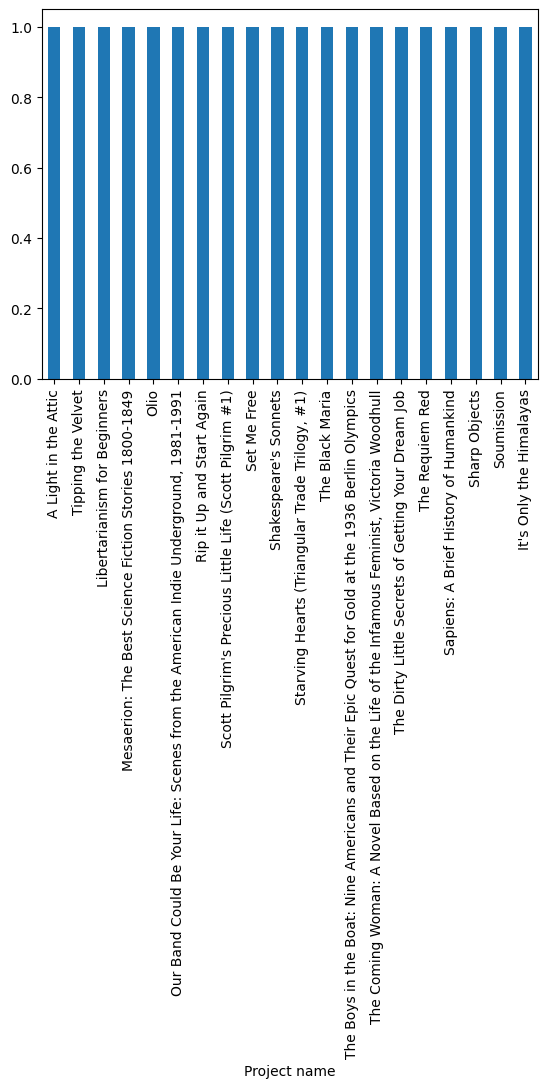

In [114]:
print(project_df['Project name'].unique()) 
project_df['Project name'].value_counts().plot.bar()

<Axes: ylabel='Frequency'>

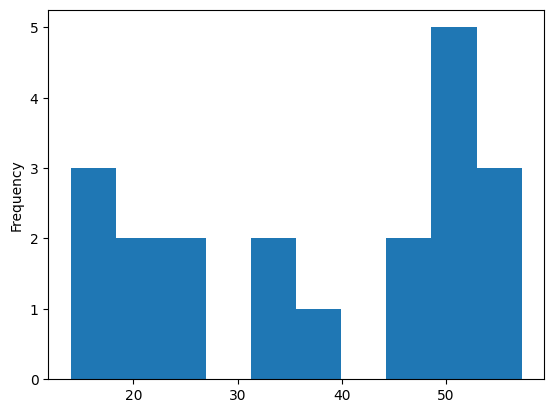

In [117]:
project_df.price = project_df.price.str.replace('£', '').astype(float)
project_df.price.plot.hist()


In [141]:
# first convert the price colone in a numerical data
project_df['price'] = project_df['price'].replace('£', '').astype(float)

# find the expensive books
idx_max = project_df['price'].idxmax()

# print the name and the price of that book
print("The most expensive book is:", project_df.loc[idx_max, 'Project name'])
print("Its price is:", project_df.loc[idx_max, 'price'])

The most expensive book is: Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Its price is: 57.25


In [134]:
idx_min = project_df['price'].idxmin(skipna=False)
print("The cheapest book is:", project_df.loc[idx_min, 'Project name'])
print("Its price is:", project_df.loc[idx_min, 'price'])

The cheapest book is: Starving Hearts (Triangular Trade Trilogy, #1)
Its price is: 13.99


In [139]:
total_amount_of_books = sum(project_df['price'].replace('£', '').astype(float))
print('the total amount of books in £ in', total_amount_of_books)

the total amount of books in £ in 760.97


### <span style="font-family:'Times New Roman';">5-Speed up web scraping with parallelization</span>

In [161]:
from concurrent.futures import ThreadPoolExecutor, as_completed
from selenium import webdriver

def create_webdriver():
    options = webdriver.EdgeOptions()  # or ChromeOptions()
    options.add_argument("--headless")  # optional
    return webdriver.Edge(options=options)

def scrape_url(url):
    browser = create_webdriver()
    browser.get(url)
    data = browser.find_element(By.XPATH, "//body")
    browser.quit()
    return data

urlarray = [
    'https://quotes.toscrape.com/',
    'https://realpython.github.io/fake-jobs/',
    'https://www.imdb.com/chart/top/'
]

results = []
with ThreadPoolExecutor(max_workers=3) as executor:
    future_results = [executor.submit(scrape_url, url) for url in urlarray]
    for future in as_completed(future_results):
        results.append(future.result())

print(results)


[<selenium.webdriver.remote.webelement.WebElement (session="51b343977f3f288b3415007ba1b67755", element="f.BF23230E81BC25AD4C1EB10E96D0567C.d.EB9CC2DD781DC94DB79A9E842664EB1C.e.7")>, <selenium.webdriver.remote.webelement.WebElement (session="48e3216dbfda237d182b6962ddffef2d", element="f.3C12A4B8127794A6A82FF5BE1FCE74C4.d.18DB8640FD5E00EEC1654D2EC06B4200.e.2")>, <selenium.webdriver.remote.webelement.WebElement (session="9439daf47ba9e2ddc30094f97e52ee27", element="f.5DC8FEAF483F62B33488B7DFF5253E80.d.1053A23EA75DF4153600A643DC56AC35.e.2")>]
